Extracting the data from my S3 bucket for the COVID19 and then performing analysis on the same

In [215]:
import boto3
from datetime import date
datetoday = date.today()
client = boto3.client('s3')
obj = client.get_object(Bucket='covid19result', Key='Unsaved/2020/04/' + str(datetoday.day) + '/1476d1ef-1ef9-415d-93df-9ec55941a9fd.csv')

In [ ]:
Importing all the necessray libraries

In [216]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [217]:
df = pd.read_csv(obj['Body'])
df.head()

,date,state,positive,negative,pending,hospitalized,death,total,hash,datechecked,totaltestresults,fips,deathincrease,hospitalizedincrease,negativeincrease,positiveincrease,totaltestresultsincrease
0,20200412,AK,272.0,7766.0,NaN,31.0,8.0,8038.0,5f686eece203e247c3bfb219c664517920d7c141,2020-04-12T20:00:00Z,8038.0,2,0.0,0.0,291.0,15.0,306.0
1,20200412,AL,3525.0,18058.0,NaN,437.0,93.0,21583.0,a10003b9814203ba98d289480736cff0b00b4009,2020-04-12T20:00:00Z,21583.0,1,2.0,35.0,0.0,334.0,334.0
2,20200412,AR,1280.0,18442.0,NaN,130.0,27.0,19722.0,6c7bd80088061ed07c0e558496324807bfdba9e0,2020-04-12T20:00:00Z,19722.0,5,3.0,0.0,1090.0,54.0,1144.0
3,20200412,AS,0.0,3.0,2.0,NaN,NaN,5.0,30bdeb66442be44960060acf5492b2203bbe4112,2020-04-12T20:00:00Z,3.0,60,0.0,0.0,0.0,0.0,0.0
4,20200412,AZ,3539.0,38570.0,NaN,NaN,115.0,42109.0,994b2dd7ad7e22da1720b4f9eaf7248665bcd81a,2020-04-12T20:00:00Z,42109.0,4,7.0,0.0,1433.0,146.0,1579.0


In [151]:
df.dtypes

date                          int64
state                        object
positive                    float64
negative                    float64
pending                     float64
hospitalized                float64
death                       float64
total                       float64
hash                         object
datechecked                  object
totaltestresults            float64
fips                          int64
deathincrease               float64
hospitalizedincrease        float64
negativeincrease            float64
positiveincrease            float64
totaltestresultsincrease    float64
dtype: object

In [218]:
df.count()
#df.fillna(df['pending'].mean(), inplace=True)
#df.fillna(df['negative'].mean(), inplace=True)

date                        2112
state                       2112
positive                    2097
negative                    1960
pending                      513
hospitalized                 590
death                       1407
total                       2110
hash                        2112
datechecked                 2112
totaltestresults            2110
fips                        2112
deathincrease               2056
hospitalizedincrease        2056
negativeincrease            2056
positiveincrease            2056
totaltestresultsincrease    2056
dtype: int64

In [219]:
df_today = df[df['date'] == 20200409]
df_today.fillna(df_today['pending'].mean(), inplace=True)
df_today.fillna(df_today['negative'].mean(), inplace=True)
df_today.count()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


date                        56
state                       56
positive                    56
negative                    56
pending                     56
hospitalized                56
death                       56
total                       56
hash                        56
datechecked                 56
totaltestresults            56
fips                        56
deathincrease               56
hospitalizedincrease        56
negativeincrease            56
positiveincrease            56
totaltestresultsincrease    56
dtype: int64

In [60]:
df_today = df_today.dropna(inplace=True)

In [152]:
df_today.tail()

,date,state,positive,negative,pending,hospitalized,death,total,hash,datechecked,totaltestresults,fips,deathincrease,hospitalizedincrease,negativeincrease,positiveincrease,totaltestresultsincrease
51,20200409,VT,628.0,7553.0,1572.501022,1572.501022,23.0,8181.0,24b22733110eb020e8f1caee0a2cb8db9dd3b934,2020-04-09T20:00:00Z,8181.0,50,0.0,0.0,409.0,23.0,432.0
52,20200409,WA,9097.0,83391.0,1572.501022,1572.501022,421.0,92488.0,4432fef25b711ff1fdb9f13c0865d67bb2fa9628,2020-04-09T20:00:00Z,92488.0,53,27.0,0.0,0.0,0.0,0.0
53,20200409,WI,2885.0,31424.0,1572.501022,843.000000,111.0,34309.0,aa5c7ae162799320b7accdadf68720fdb6c50f52,2020-04-09T20:00:00Z,34309.0,55,12.0,53.0,1309.0,129.0,1438.0
54,20200409,WV,523.0,13340.0,1572.501022,1572.501022,5.0,13863.0,54cf0e05059125cce24ebdf1fdfdff35af1f361b,2020-04-09T20:00:00Z,13863.0,54,1.0,0.0,1257.0,61.0,1318.0
55,20200409,WY,230.0,3920.0,1572.501022,34.000000,0.0,4150.0,231a30211b44fe5c73eef7f2161a0d501c682df9,2020-04-09T20:00:00Z,4150.0,56,0.0,1.0,77.0,9.0,86.0


In [110]:
df_today.count()


date                        56
state                       56
positive                    56
negative                    56
pending                     56
hospitalized                56
death                       56
total                       56
hash                        56
datechecked                 56
totaltestresults            56
fips                        56
deathincrease               56
hospitalizedincrease        56
negativeincrease            56
positiveincrease            56
totaltestresultsincrease    56
dtype: int64

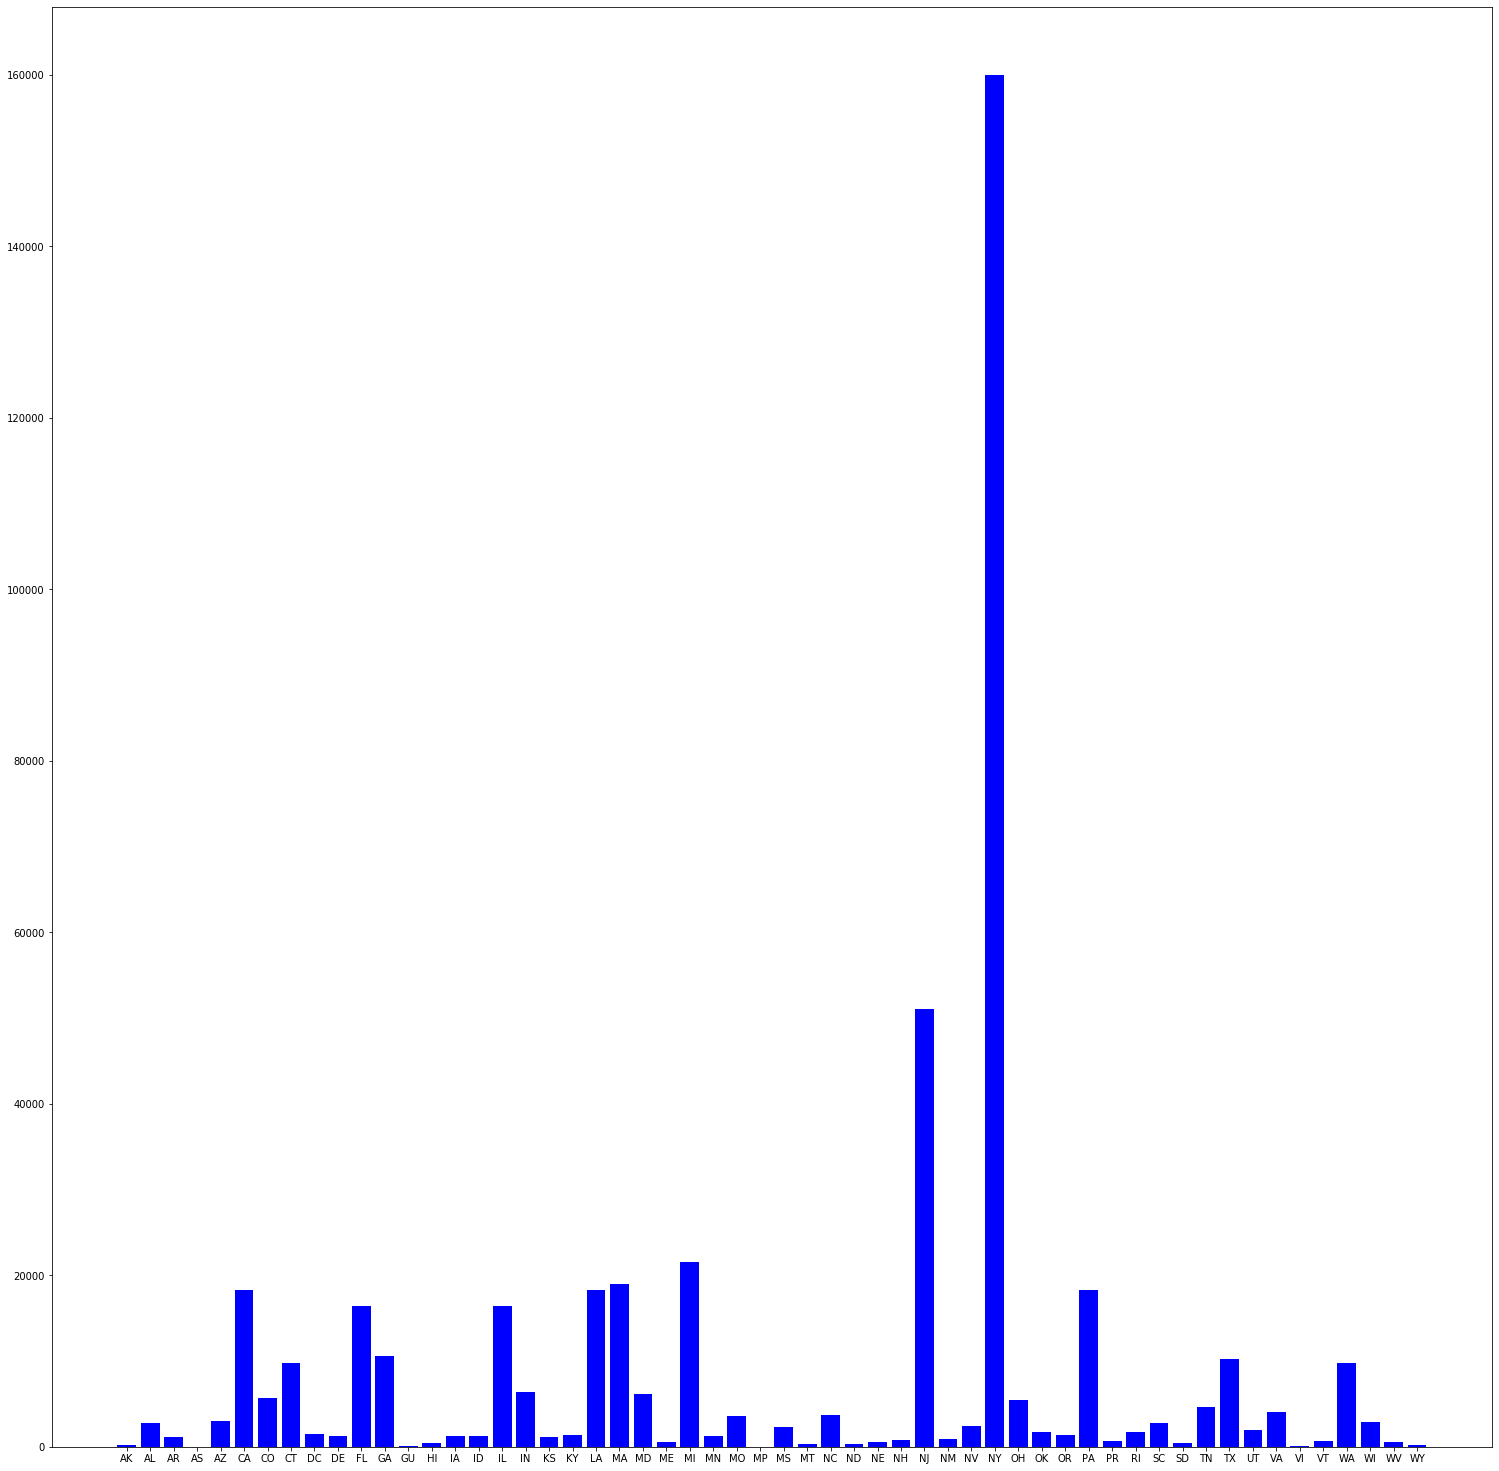

In [224]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_today['state'],df_today['positive'], color=['blue'])
plt.show()

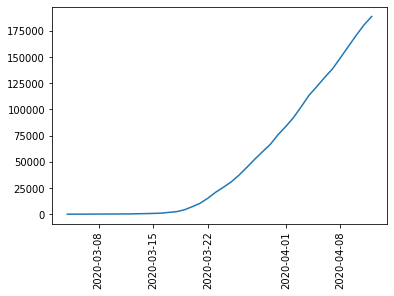

In [222]:
#fig = plt.figure(figsize=(20,20))
#ax = fig.add_axes([0,0,1,1])
df['datetime'] = df['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
plt.plot(df[df['state'] == 'NY']['datetime'],df[df['state'] == 'NY']['positive'])
plt.xticks(rotation=90)
plt.show()

No handles with labels found to put in legend.


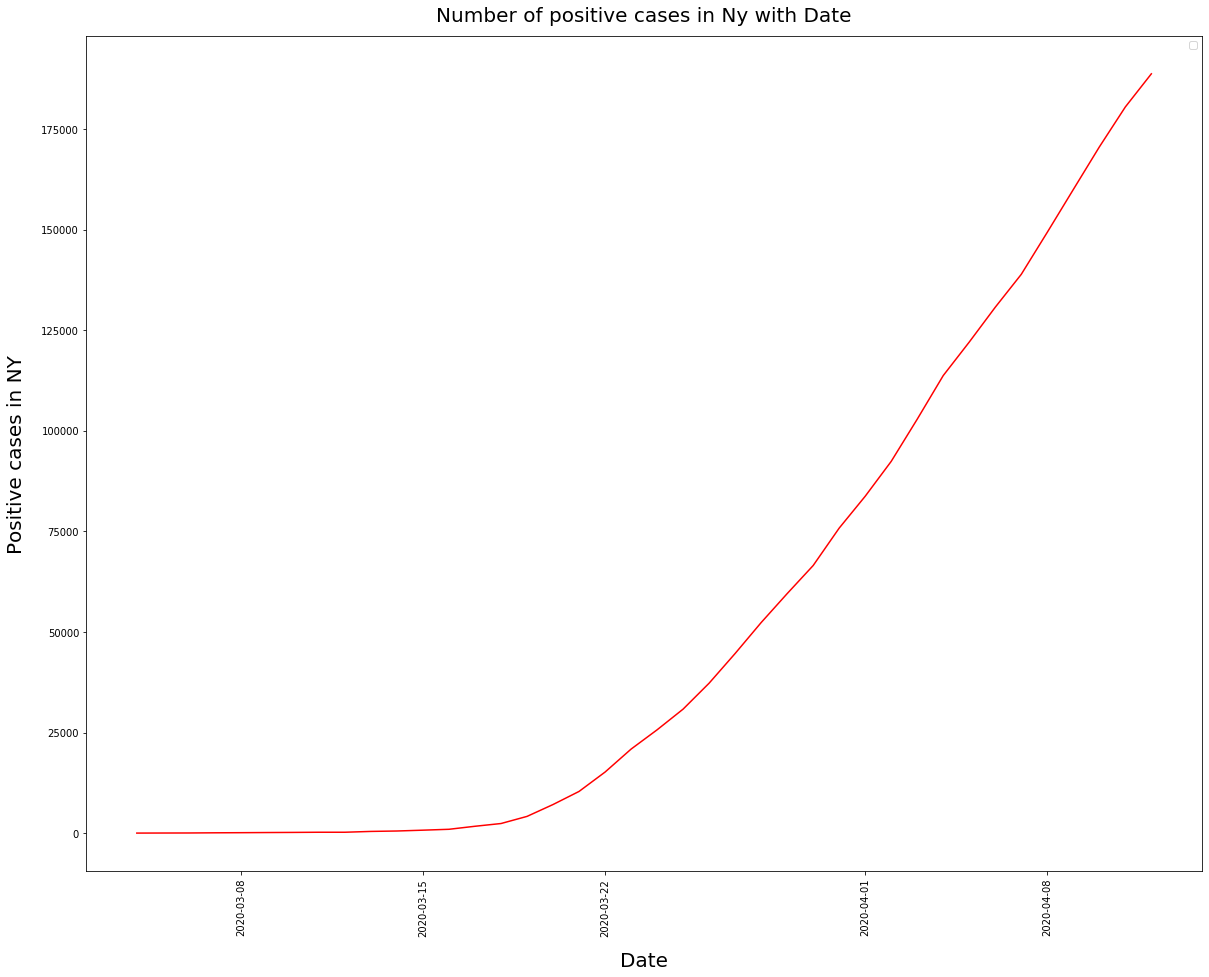

In [223]:
# plt.xticks(rotation=90)
# df[df['state'] == 'NY'].plot(x='datetime', y='positive', kind='line', 
#         figsize=(15,15 ), legend=True, style='yo-', label="positive people in NY by date")

# DF = pd.DataFrame()
# DF['temp'] = temp
# DF = DF.set_index(date_time)
#df['date_time'] = pd.to_datetime(df['date'])
fig, ax = plt.subplots(figsize=(20,20))
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.title("Number of positive cases in Ny with Date", y=1.01, fontsize=20)
plt.xlabel('Date',labelpad=15,fontsize=20)
plt.ylabel('Positive cases in NY',labelpad=15,fontsize=20)
plt.legend()
# plt.plot(df[df['state'] == 'NY']['datetime'],df[df['state'] == 'NY']['positive'])
plt.plot(df[df['state'] == 'NY']['datetime'], df[df['state'] == 'NY']['positive'],'r')